In [21]:
from google.cloud import vision
from dotenv import load_dotenv
from PIL import Image
import os
import re
import json
import base64
import jiwer
from google.oauth2 import service_account
import difflib
from IPython.display import HTML, display

In [2]:
# Die Zeile muss man nicht laufen lassen, wenn man RENKU-Instanz verwendet
load_dotenv()

True

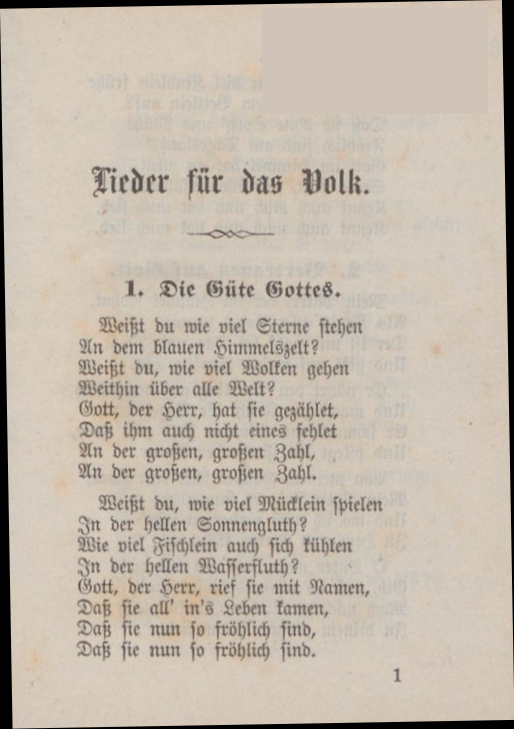

In [7]:
# Path to your image
image_path = "../data/no_purple.png"
im = Image.open(image_path)
im

In [8]:
g_json = os.environ["GOOGLE_APPLICATION_CREDENTIALS_JSON"]

In [9]:

#service_account_info = json.loads(base64.b64decode(b64))
service_account_info = json.loads(g_json)

credentials = service_account.Credentials.from_service_account_info(service_account_info)
client = vision.ImageAnnotatorClient(credentials=credentials)


In [10]:
with open(image_path, "rb") as image_file:
        content = image_file.read()

image = vision.Image(content=content)
response = client.text_detection(image=image)
texts = response.text_annotations

if texts:
    text = texts[0]
    prediction = text.description
    print(text.description)

else:
    print("No text detected.")


Lieder für das Volk.
1. Die Güte Gottes.
Weißt du wie viel Sterne stehen
An dem blauen Himmelszelt?
Weißt du, wie viel Wolfen gehen ni
Weithin über alle Welt?
Gott, der Herr, hat sie gezählet,
Daß ihm auch nicht eines fehlet
An der großen, großen Zahl,
An der großen, großen Zahl.
Weißt du, wie viel Mücklein spielen
In der hellen Sonnengluth?
Wie viel Fischlein auch sich fühlen
In der hellen Wasserfluth?
Gott, der Herr, rief sie mit Namen,
Daß fie all' in's Leben kamen,
Daß sie nun so fröhlich sind,
Daß sie nun so fröhlich sind.
1


In [16]:
# Postprozess

predict_list = prediction.split("\n")
del predict_list[-1]
prediction = "\n".join(predict_list)
print(prediction)

Lieder für das Volk.
1. Die Güte Gottes.
Weißt du wie viel Sterne stehen
An dem blauen Himmelszelt?
Weißt du, wie viel Wolfen gehen ni
Weithin über alle Welt?
Gott, der Herr, hat sie gezählet,
Daß ihm auch nicht eines fehlet
An der großen, großen Zahl,
An der großen, großen Zahl.
Weißt du, wie viel Mücklein spielen
In der hellen Sonnengluth?
Wie viel Fischlein auch sich fühlen
In der hellen Wasserfluth?
Gott, der Herr, rief sie mit Namen,
Daß fie all' in's Leben kamen,
Daß sie nun so fröhlich sind,
Daß sie nun so fröhlich sind.


In [17]:
with open("../data/test_1.txt", encoding="utf-8") as f:
    gt = f.read()

In [22]:
# Vor der Fehlerberechnung entfernen wir Zeilenumbrüche und Leer-Zeichen (Sonst werden sie eventuell als Fehler mitgezählt)
p_x = re.sub("[\n]+", " ", prediction)
p_y = re.sub(r"[\s]+", " ", p_x)
gt_x = re.sub("[\n]+", " ", gt)
gt_y = re.sub(r"[\s]+", " ", gt_x)

In [23]:
# WER
error = jiwer.wer(
    gt_y,
    p_y
)
print(f"Word Error Rate (WER): {error:.4f}")

# CER
char_error = jiwer.cer(
    gt_y,
    p_y
)
print(f"Character Error Rate (CER): {char_error:.4f}")

Word Error Rate (WER): 0.0421
Character Error Rate (CER): 0.0113


In [24]:
transformation = jiwer.process_words(
    gt_y,
    p_y
)



print("\n--- Error-Analyse ---")
print(f"Insertions: {transformation.insertions}")
print(f"Deletions: {transformation.deletions}")
print(f"Substitutions: {transformation.substitutions}")

total_errors = transformation.insertions + transformation.deletions + transformation.substitutions
print(f"Total errors: {total_errors}")

reference_words = len(gt_y.split())
print(f"Reference words: {reference_words}")


--- Error-Analyse ---
Insertions: 1
Deletions: 0
Substitutions: 3
Total errors: 4
Reference words: 95


In [25]:
df = difflib.HtmlDiff()
res = df.make_file(gt_y.split(), p_y.split(),)
display(HTML(res))

f,1,Lieder,f,1,Lieder
,2,für,,2,für
,3,das,,3,das
,4,Volk.,,4,Volk.
,5,1.,,5,1.
,6,Die,,6,Die
,7,Güte,,7,Güte
,8,Gottes.,,8,Gottes.
,9,Weißt,,9,Weißt
,10,du,,10,du
,11,wie,,11,wie
